In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data_age_group = pd.read_csv('../Dataset/AgeGroupDetails.csv')

In [3]:
data_age_group

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [4]:
data_zone_wise = pd.read_csv('../DataSet/zone-wise-data.csv')

In [5]:
data_zone_wise.fillna('Orange',inplace=True)

In [6]:
data_zone_wise.head()

,district,districtcode,lastupdated,source,state,statecode,zone
0,Nicobars,AN_Nicobars,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
1,North and Middle Andaman,AN_North and Middle Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
2,South Andaman,AN_South Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Red
3,Anantapur,AP_Anantapur,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andhra Pradesh,AP,Orange
4,Chittoor,AP_Chittoor,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andhra Pradesh,AP,Red


In [7]:
data_country_wise = pd.read_csv('../DataSet/covid_19_Country-wise-data.csv')

In [8]:
data_country_wise.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0


In [9]:
data_hospitalbed = pd.read_csv('../DataSet/HospitalBedsIndia.csv')

In [10]:
data_hospitalbed.head()

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
1,2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
2,3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
3,4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198
4,5,Bihar,2007,63,33.0,43,2146,17796,930,6083,103,5936


In [11]:
states = pd.read_csv("../DataSet/state_wise.csv")
states.head()


,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes
0,Total,529274,310068,16102,203048,27/06/2020 22:46:13,56,TT,19829,14151,413,NaN
1,Maharashtra,159133,84245,7273,67600,27/06/2020 20:36:15,15,MH,6368,4430,167,15 cases were marked as non-covid deaths in MH...
2,Tamil Nadu,78335,44094,1025,33216,27/06/2020 18:46:18,0,TN,3713,2737,68,2 deaths cross notified to other states from C...
3,Delhi,80188,49301,2558,28329,27/06/2020 19:25:15,0,DL,2948,2210,66,"Delhi bulletins in the morning, containing dat..."
4,Gujarat,30771,22417,1790,6564,27/06/2020 21:06:16,0,GJ,613,379,18,NaN


# Data Wrangling

In [12]:
states_get = states[states.State != 'Total']

## AgeGroupDetails

In [13]:

data_age_group.set_index('Sno',inplace=True)


In [14]:
data_age_group.drop(['TotalCases'],axis=1,inplace=True)
data_age_group.replace({'Percentage': '[A-Za-z %]' },"", regex=True,inplace=True)
data_age_group.replace({'AgeGroup': 'Missing' },"Super Senior Citizen", regex=True,inplace=True)
data_age_group

,AgeGroup,Percentage
Sno,,
1,0-9,3.18
2,10-19,3.90
3,20-29,24.86
4,30-39,21.10
5,40-49,16.18
6,50-59,11.13
7,60-69,12.86
8,70-79,4.05
9,>=80,1.45


In [15]:
def float_to_int(s):
    return float(s)
data_age_group['Percentage'] = data_age_group['Percentage'].apply(float_to_int)
data_age_group

,AgeGroup,Percentage
Sno,,
1,0-9,3.18
2,10-19,3.90
3,20-29,24.86
4,30-39,21.10
5,40-49,16.18
6,50-59,11.13
7,60-69,12.86
8,70-79,4.05
9,>=80,1.45


In [16]:
data_age_group.isnull().sum()

AgeGroup      0
Percentage    0
dtype: int64

# Zone-Wise Data

In [17]:
data_zone_wise.drop(['source','districtcode'],axis=1,inplace=True)


In [18]:
data_zone_wise.head()

,district,lastupdated,state,statecode,zone
0,Nicobars,01/05/2020,Andaman and Nicobar Islands,AN,Green
1,North and Middle Andaman,01/05/2020,Andaman and Nicobar Islands,AN,Green
2,South Andaman,01/05/2020,Andaman and Nicobar Islands,AN,Red
3,Anantapur,01/05/2020,Andhra Pradesh,AP,Orange
4,Chittoor,01/05/2020,Andhra Pradesh,AP,Red


In [19]:
data_zone_wise.isnull().sum()

district       0
lastupdated    0
state          0
statecode      0
zone           0
dtype: int64

# covid_19_Country-wise-data

In [20]:
data_country_wise.set_index('SNo',inplace=True)

In [21]:
def clear_time(s):
    s = s.split(" ")
    s = s[0]
    return s
data_country_wise.drop(['Province/State','ObservationDate'],axis=1,inplace=True)
data_country_wise['Last Update'] = data_country_wise['Last Update'].apply(clear_time)
data_country_wise.head(2)

,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,
1,Mainland China,1/22/2020,1,0,0
2,Mainland China,1/22/2020,14,0,0


In [22]:
def float_to_int(s):
    s = int(s)
    return(s)

data_country_wise['Confirmed'] = data_country_wise['Confirmed'].apply(float_to_int)
data_country_wise['Deaths'] = data_country_wise['Deaths'].apply(float_to_int)
data_country_wise['Recovered'] = data_country_wise['Recovered'].apply(float_to_int)
data_country_wise.head(4)

,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,
1,Mainland China,1/22/2020,1,0,0
2,Mainland China,1/22/2020,14,0,0
3,Mainland China,1/22/2020,6,0,0
4,Mainland China,1/22/2020,1,0,0


In [23]:
data_country_wise.isnull().sum()

Country/Region    0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

# HospitalBedsIndia

In [24]:
data_hospitalbed.set_index('Sno',inplace=True)

In [25]:
data_hospitalbed.head(4)

,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
Sno,,,,,,,,,,,
1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500
2,Andhra Pradesh,1417,198,31.0,20,1666,60799,193,6480,65,16658
3,Arunachal Pradesh,122,62,NaN,15,199,2320,208,2136,10,268
4,Assam,1007,166,14.0,33,1220,19115,1176,10944,50,6198


In [26]:
l=list(data_hospitalbed.columns)
for i in l:
    print(i)

State/UT
NumPrimaryHealthCenters_HMIS
NumCommunityHealthCenters_HMIS
NumSubDistrictHospitals_HMIS
NumDistrictHospitals_HMIS
TotalPublicHealthFacilities_HMIS
NumPublicBeds_HMIS
NumRuralHospitals_NHP18
NumRuralBeds_NHP18
NumUrbanHospitals_NHP18
NumUrbanBeds_NHP18


In [27]:
data_hospitalbed.isnull().sum()

State/UT                            0
NumPrimaryHealthCenters_HMIS        0
NumCommunityHealthCenters_HMIS      0
NumSubDistrictHospitals_HMIS        7
NumDistrictHospitals_HMIS           0
TotalPublicHealthFacilities_HMIS    0
NumPublicBeds_HMIS                  0
NumRuralHospitals_NHP18             0
NumRuralBeds_NHP18                  0
NumUrbanHospitals_NHP18             0
NumUrbanBeds_NHP18                  0
dtype: int64

In [28]:
# def float_to_int(s):
#     if ',' in str(s):
#         l=s.split(',')
#         s=l[0]+l[1]
#     return int(s)
# data_hospitalbed['NumPrimaryHealthCenters_HMIS'] = data_hospitalbed['NumPrimaryHealthCenters_HMIS'].apply(float_to_int)
# data_hospitalbed['NumCommunityHealthCenters_HMIS'] = data_hospitalbed['NumCommunityHealthCenters_HMIS'].apply(float_to_int)
# data_hospitalbed['NumDistrictHospitals_HMIS'] = data_hospitalbed['NumDistrictHospitals_HMIS'].apply(float_to_int)
# data_hospitalbed['TotalPublicHealthFacilities_HMIS'] = data_hospitalbed['TotalPublicHealthFacilities_HMIS'].apply(float_to_int)
# data_hospitalbed['NumPublicBeds_HMIS'] = data_hospitalbed['NumPublicBeds_HMIS'].apply(float_to_int)
# data_hospitalbed['NumRuralHospitals_NHP18'] = data_hospitalbed['NumRuralHospitals_NHP18'].apply(float_to_int)
# data_hospitalbed['NumRuralBeds_NHP18'] = data_hospitalbed['NumRuralBeds_NHP18'].apply(float_to_int)
# data_hospitalbed['NumUrbanHospitals_NHP18'] = data_hospitalbed['NumUrbanHospitals_NHP18'].apply(float_to_int)
# data_hospitalbed['NumUrbanBeds_NHP18'] = data_hospitalbed['NumUrbanBeds_NHP18'].apply(float_to_int)


# data_hospitalbed.head()
data_hospitalbed.rename(columns={'TotalPublicHealthFacilities_HMIS':'Total Health Centers', 'NumPublicBeds_HMIS': 'Total Beds'},inplace=True)
data_hospitalbed.drop(['NumPrimaryHealthCenters_HMIS','NumCommunityHealthCenters_HMIS'\
                       ,'NumSubDistrictHospitals_HMIS','NumDistrictHospitals_HMIS'\
                       ,'NumRuralHospitals_NHP18','NumRuralBeds_NHP18'\
                       ,'NumUrbanHospitals_NHP18','NumUrbanBeds_NHP18'],axis=1,inplace=True)

data_hospitalbed.head()


,State/UT,Total Health Centers,Total Beds
Sno,,,
1,Andaman & Nicobar Islands,34,1246
2,Andhra Pradesh,1666,60799
3,Arunachal Pradesh,199,2320
4,Assam,1220,19115
5,Bihar,2146,17796


In [29]:

country_groupby = data_country_wise.groupby(['Country/Region'])
country_groupby = country_groupby.last()
country_groupby.head()

,Last Update,Confirmed,Deaths,Recovered
Country/Region,,,,
Azerbaijan,2020-02-28T15:03:26,1,0,0
Afghanistan,18-05-2020,6664,169,778
Albania,18-05-2020,946,31,715
Algeria,18-05-2020,7019,548,3507
Andorra,18-05-2020,761,51,617


In [30]:

def clean_dates(s):
    if 'T' in s:
        s = s.split('T')
        s = s[0]
    return s
country_groupby['Last Update'] = country_groupby['Last Update'].apply(clean_dates)
country_groupby.head()

,Last Update,Confirmed,Deaths,Recovered
Country/Region,,,,
Azerbaijan,2020-02-28,1,0,0
Afghanistan,18-05-2020,6664,169,778
Albania,18-05-2020,946,31,715
Algeria,18-05-2020,7019,548,3507
Andorra,18-05-2020,761,51,617


# After Wrangling

In [31]:
data_age_group.head(3)

,AgeGroup,Percentage
Sno,,
1,0-9,3.18
2,10-19,3.90
3,20-29,24.86


In [32]:
cols = list(data_age_group.columns)
print("Columns")
for i in cols:
    print(i)

Columns
AgeGroup
Percentage


In [33]:
data_age_group.isnull().sum()

AgeGroup      0
Percentage    0
dtype: int64

In [34]:
data_zone_wise.head(3)

,district,lastupdated,state,statecode,zone
0,Nicobars,01/05/2020,Andaman and Nicobar Islands,AN,Green
1,North and Middle Andaman,01/05/2020,Andaman and Nicobar Islands,AN,Green
2,South Andaman,01/05/2020,Andaman and Nicobar Islands,AN,Red


In [35]:
cols = list(data_zone_wise.columns)
print("Columns")
for i in cols:
    print(i)

Columns
district
lastupdated
state
statecode
zone


In [36]:
data_zone_wise.isnull().sum()

district       0
lastupdated    0
state          0
statecode      0
zone           0
dtype: int64

In [37]:
data_country_wise.head(3)

,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,
1,Mainland China,1/22/2020,1,0,0
2,Mainland China,1/22/2020,14,0,0
3,Mainland China,1/22/2020,6,0,0


In [38]:
cols = list(data_country_wise.columns)
print("Columns")
for i in cols:
    print(i)

Columns
Country/Region
Last Update
Confirmed
Deaths
Recovered


In [39]:
data_country_wise.isnull().sum()

Country/Region    0
Last Update       0
Confirmed         0
Deaths            0
Recovered         0
dtype: int64

In [40]:
data_hospitalbed.head(3)

,State/UT,Total Health Centers,Total Beds
Sno,,,
1,Andaman & Nicobar Islands,34,1246
2,Andhra Pradesh,1666,60799
3,Arunachal Pradesh,199,2320


In [41]:
cols = list(data_hospitalbed.columns)
print("Columns")
for i in cols:
    print(i)

Columns
State/UT
Total Health Centers
Total Beds


In [42]:
data_hospitalbed.isnull().sum()

State/UT                0
Total Health Centers    0
Total Beds              0
dtype: int64

# Visualization

# Data Age Wise

In [43]:
data_age_group

,AgeGroup,Percentage
Sno,,
1,0-9,3.18
2,10-19,3.90
3,20-29,24.86
4,30-39,21.10
5,40-49,16.18
6,50-59,11.13
7,60-69,12.86
8,70-79,4.05
9,>=80,1.45


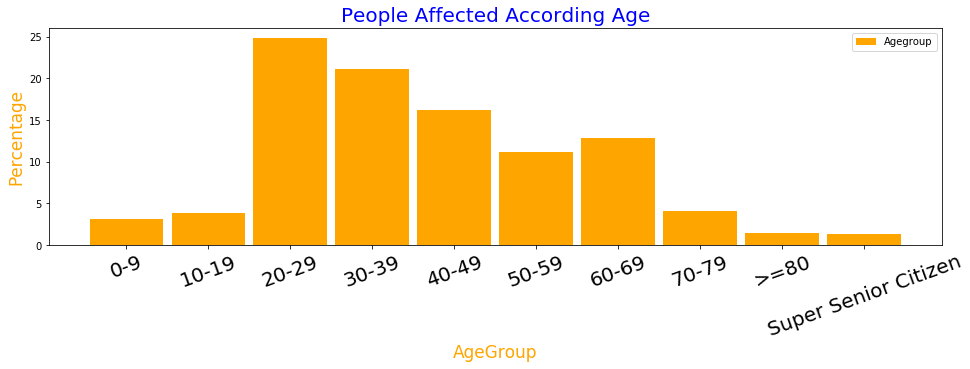

In [44]:
plt.rcParams["figure.figsize"] = (16, 4)
y = list(data_age_group['AgeGroup'])
y=len(y)
y=[i for i in range(y)]

series = list(data_age_group['Percentage'])
plt.bar(data_age_group['AgeGroup'],series,width=0.9,label='Agegroup',color='orange')
plt.xlabel('AgeGroup',color='orange',size=17)
plt.ylabel('Percentage',color='orange',size=17)
plt.title('People Affected According Age',color='b',size=20)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['0-9', '10-19', '20-29','30-39', '40-49', '50-59', '60-69', '70-79', '>=80', 'Super Senior Citizen'],rotation=20,size=20)
plt.legend()
plt.show()

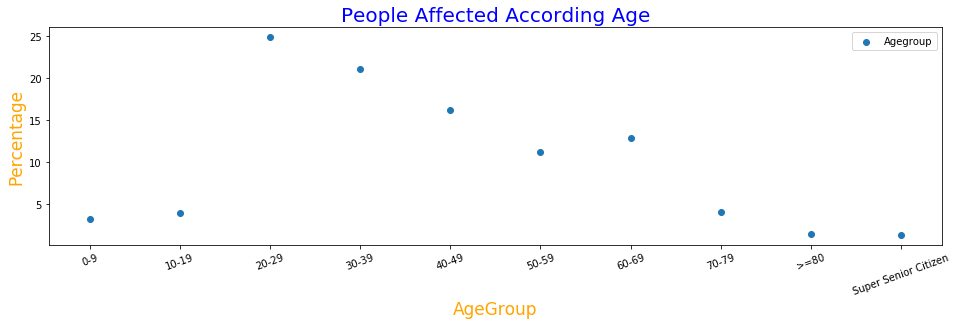

In [45]:
plt.scatter(data_age_group['AgeGroup'],series,label='Agegroup')
plt.xlabel('AgeGroup',color='orange',size=17)
plt.ylabel('Percentage',color='orange',size=17)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['0-9', '10-19', '20-29','30-39', '40-49', '50-59', '60-69', '70-79', '>=80', 'Super Senior Citizen'],rotation=20)
plt.title('People Affected According Age',color='b',size=20)
plt.legend()
plt.show()

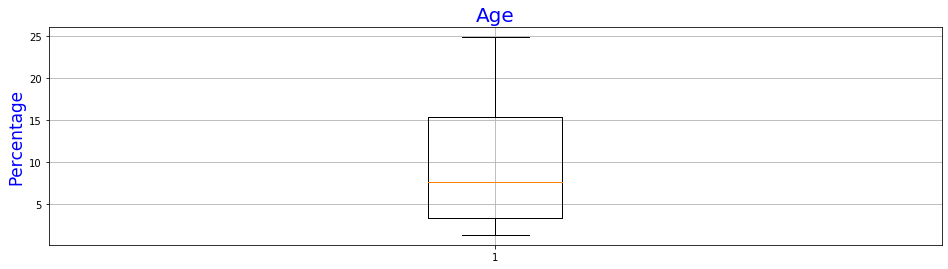

In [46]:
plt.boxplot(data_age_group['Percentage'])
plt.ylabel('Percentage',color='b',size=17)
plt.title('Age',color='b',size=20)
plt.grid(True)

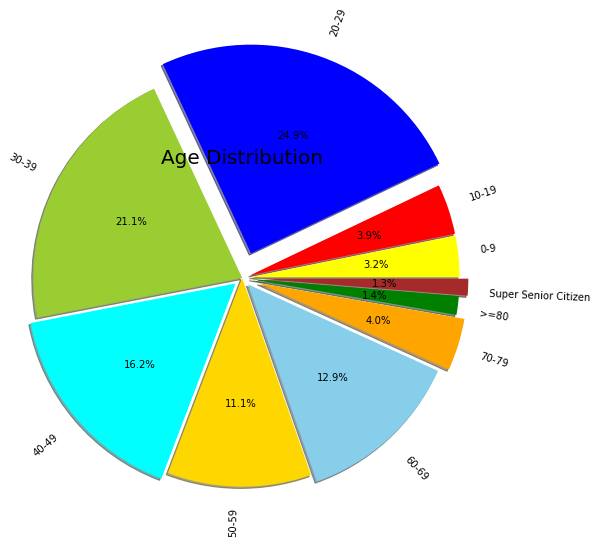

In [47]:
color=['yellow','red','blue','yellowgreen','cyan','gold','skyblue','orange','green','brown']
explode = (0.1,0.1,0.3,0,0.1,0,0.1,0.2,0.1,0.2)
plt.pie(data_age_group['Percentage'],labels=data_age_group['AgeGroup'],colors=color,autopct='%1.1f%%',radius=2.4,pctdistance=0.6,shadow=True,explode=explode,rotatelabels=2)
plt.title('Age Distribution',color='black',size=20)
plt
plt.show()

# Zone Wise Data

In [48]:
data_zone_wise.head(4)

,district,lastupdated,state,statecode,zone
0,Nicobars,01/05/2020,Andaman and Nicobar Islands,AN,Green
1,North and Middle Andaman,01/05/2020,Andaman and Nicobar Islands,AN,Green
2,South Andaman,01/05/2020,Andaman and Nicobar Islands,AN,Red
3,Anantapur,01/05/2020,Andhra Pradesh,AP,Orange


In [49]:
data_zone_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 5 columns):
district       735 non-null object
lastupdated    735 non-null object
state          735 non-null object
statecode      735 non-null object
zone           735 non-null object
dtypes: object(5)
memory usage: 28.8+ KB


In [50]:
data_zone_wise[data_zone_wise['zone']=='Green'].count()

district       277
lastupdated    277
state          277
statecode      277
zone           277
dtype: int64

In [51]:
data_zone_wise[data_zone_wise['zone']=='Orange'].count()

district       328
lastupdated    328
state          328
statecode      328
zone           328
dtype: int64

In [52]:
data_zone_wise[data_zone_wise['zone']=='Red'].count()

district       130
lastupdated    130
state          130
statecode      130
zone           130
dtype: int64

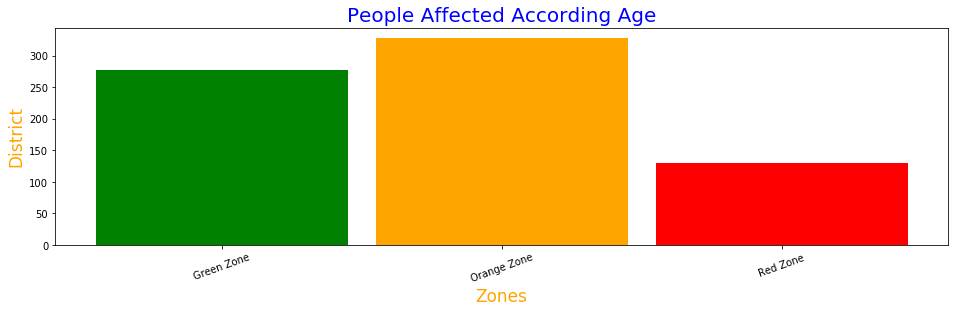

In [53]:
plt.rcParams["figure.figsize"] = (16, 4)
series = list(data_age_group['Percentage'])
plt.bar(['Green','Orange','Red'],[277,328,130],width=0.9,color=['green','orange','red'])
plt.xlabel('Zones',color='orange',size=17)
plt.ylabel('District',color='orange',size=17)
plt.title('People Affected According Age',color='b',size=20)
plt.xticks([0, 1, 2], ['Green Zone', 'Orange Zone', 'Red Zone'],rotation=20)

plt.show()

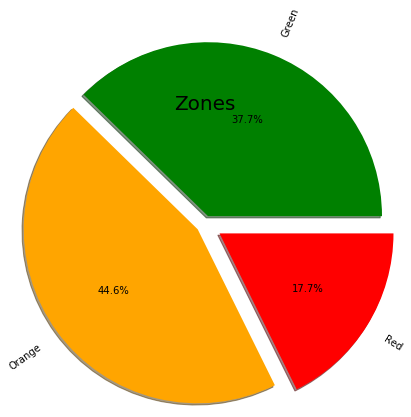

In [54]:
color=['Green','Orange','Red']
explode = (0.1,0.1,0.2)
plt.pie([277,328,130],labels=['Green','Orange','Red'],colors=color,autopct='%1.1f%%',radius=2.,pctdistance=0.6,shadow=True,explode=explode,rotatelabels=2)
plt.title('Zones',color='black',size=20)

plt.show()

In [55]:
a=data_zone_wise.groupby('state')

In [56]:
states_union_terr=[]
for state,j in a:
    states_union_terr.append(state)
print(len(states_union_terr))

36


In [57]:
a=data_zone_wise[data_zone_wise['zone']=='Green']
a[a['state']=='Andaman and Nicobar Islands'].count()


district       2
lastupdated    2
state          2
statecode      2
zone           2
dtype: int64

In [58]:
green_zone=[]
orange_zone=[]
red_zone=[]

for su in states_union_terr:
    a=data_zone_wise[data_zone_wise['state']==su]
    b=a[a['zone']=='Green'].count()
    green_zone.append(b['district'])
    b=a[a['zone']=='Orange'].count()
    orange_zone.append(b['district'])
    b=a[a['zone']=='Red'].count()
    red_zone.append(b['district'])


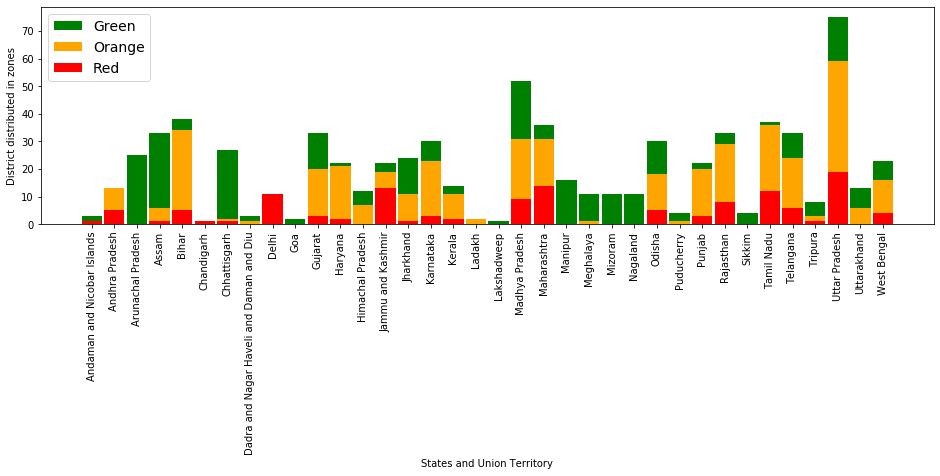

In [59]:
plt.rcParams["figure.figsize"] = (16, 4)

green_zone=np.array(green_zone)
orange_zone=np.array(orange_zone)
red_zone=np.array(red_zone)
var=[i for i in range(36)]
plt.bar(var,green_zone,width=0.9,label='Green',color='green',bottom=orange_zone+red_zone)
plt.bar(var,orange_zone,width=0.9,label='Orange',color='orange',bottom=red_zone)
plt.bar(var,red_zone,width=0.9,label='Red',color='red')
plt.legend(fontsize = 14)
plt.xticks(var,states_union_terr,rotation=90)
plt.xlabel('States and Union Territory')
plt.ylabel('District distributed in zones')
plt.show()


In [60]:
data_country_wise.head()


,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,
1,Mainland China,1/22/2020,1,0,0
2,Mainland China,1/22/2020,14,0,0
3,Mainland China,1/22/2020,6,0,0
4,Mainland China,1/22/2020,1,0,0
5,Mainland China,1/22/2020,0,0,0


In [61]:
countries_region = data_country_wise.groupby('Country/Region')


In [62]:
country=[]
for cr,j in countries_region:
    country.append(cr)
country
print(len(country))


    

222


# Country wise data

In [63]:
data_country_wise.head()

,Country/Region,Last Update,Confirmed,Deaths,Recovered
SNo,,,,,
1,Mainland China,1/22/2020,1,0,0
2,Mainland China,1/22/2020,14,0,0
3,Mainland China,1/22/2020,6,0,0
4,Mainland China,1/22/2020,1,0,0
5,Mainland China,1/22/2020,0,0,0


# Hospital Beds

In [64]:
data_hospitalbed.head()

,State/UT,Total Health Centers,Total Beds
Sno,,,
1,Andaman & Nicobar Islands,34,1246
2,Andhra Pradesh,1666,60799
3,Arunachal Pradesh,199,2320
4,Assam,1220,19115
5,Bihar,2146,17796


In [65]:
data_hospitalbed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 1 to 37
Data columns (total 3 columns):
State/UT                37 non-null object
Total Health Centers    37 non-null int64
Total Beds              37 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


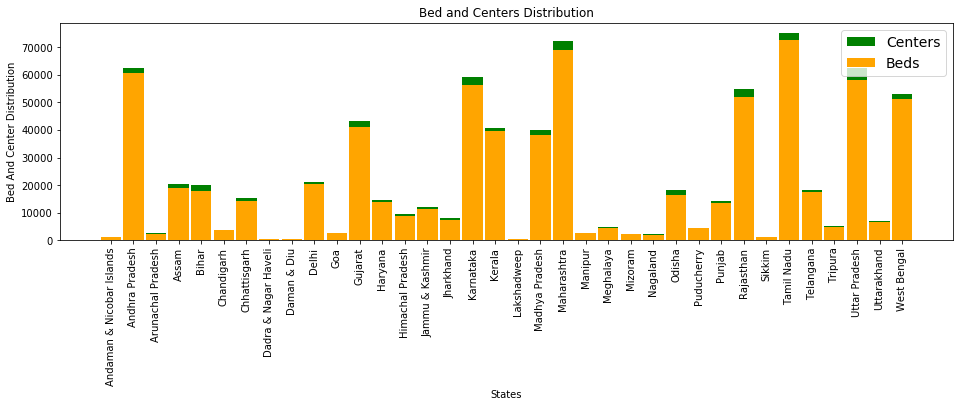

In [66]:
plt.rcParams["figure.figsize"] = (16, 4)
var=[i for i in range(36)]
health_center = list(data_hospitalbed['Total Health Centers'])
total_beds = list(data_hospitalbed['Total Beds'])
states = list(data_hospitalbed['State/UT'])
health_center.pop(36)
total_beds.pop(36)
states.pop(36)



plt.bar(var,health_center,width=0.9,label='Centers',color='green',bottom=total_beds)
plt.bar(var,total_beds,width=0.9,label='Beds',color='orange')
plt.legend(fontsize = 14)
plt.xticks(var,states,rotation=90)
plt.xlabel('States')
plt.title('Bed and Centers Distribution')
plt.ylabel('Bed And Center Distribution')
plt.show()


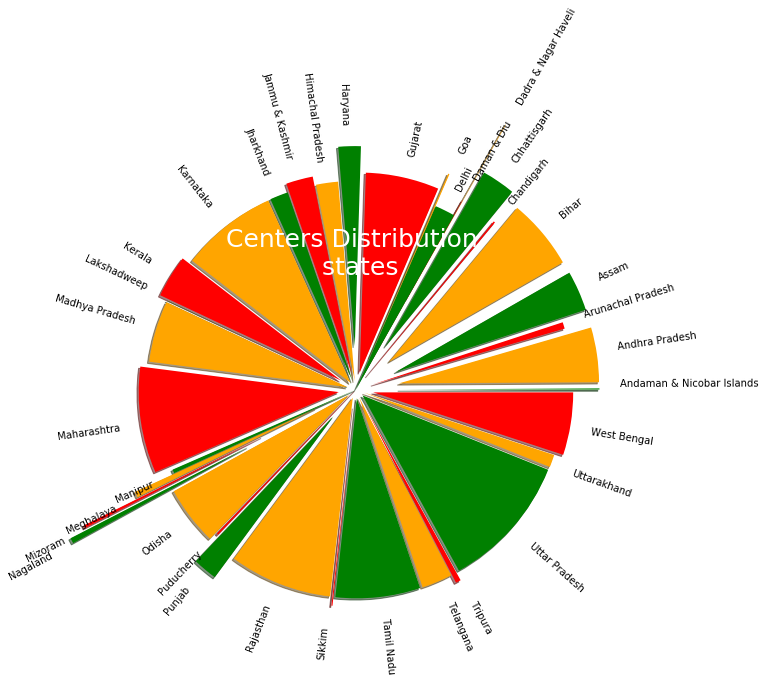

In [67]:
color=['Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red']
explode = (0.5,0.5,0.2,0.5,0.5,0.2,0.6,1.2,0.20,0,0.40,0.2,0.5,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.2,0,0.5,1.2,1.4,0.1,0,0.4,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.2)
plt.pie(health_center,labels=states,colors=color,radius=2.3,pctdistance=1,shadow=True,explode=explode,rotatelabels=2,)
plt.title('Centers Distribution \n states',color='white',size=25)

plt.show()

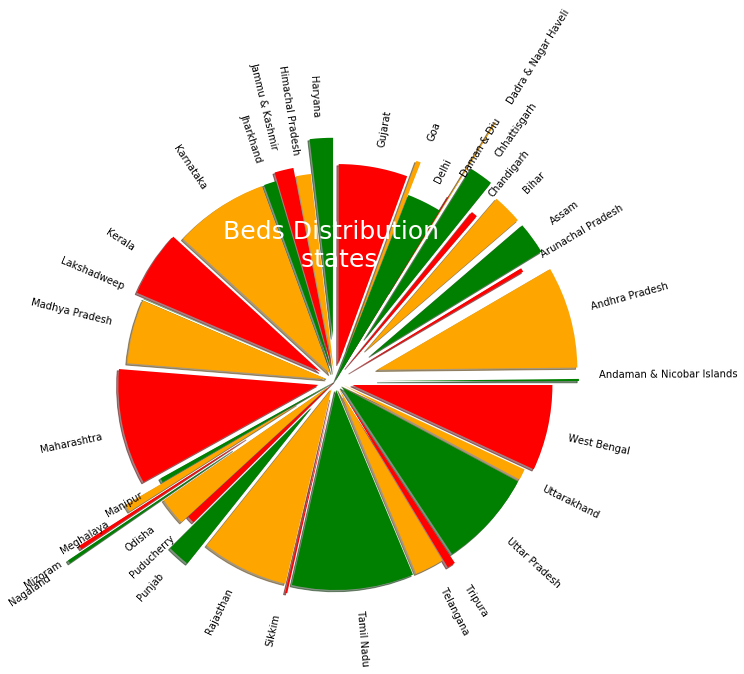

In [68]:

color=['Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red','Green','Orange','Red']
explode = (0.5,0.5,0.2,0.5,0.5,0.2,0.6,1.2,0.20,0,0.40,0.2,0.5,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.2,0,0.5,1.2,1.4,0.1,0,0.4,0.1,0.2,0.1,0.1,0.2,0.1,0.1,0.2)
plt.pie(total_beds,labels=states,colors=color,radius=2.3,pctdistance=0.6,shadow=True,explode=explode,rotatelabels=2)
plt.title('Beds Distribution \n states',color='white',size=25)

plt.show()

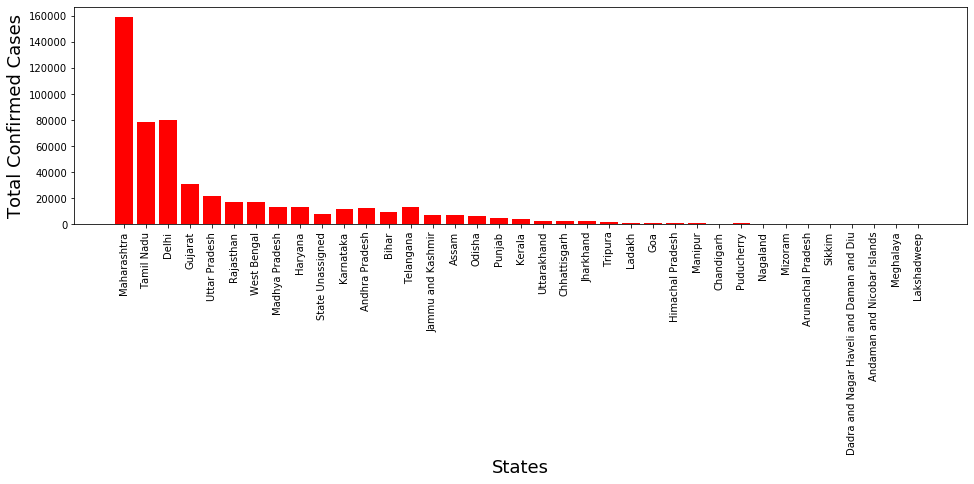

In [69]:
plt.rcParams["figure.figsize"] = (16, 4)

plt.bar(states_get['State'],states_get['Confirmed'],color='r')

plt.xlabel('States',size=18)
plt.ylabel('Total Confirmed Cases', size=18)
plt.xticks(rotation=90)

plt.show()

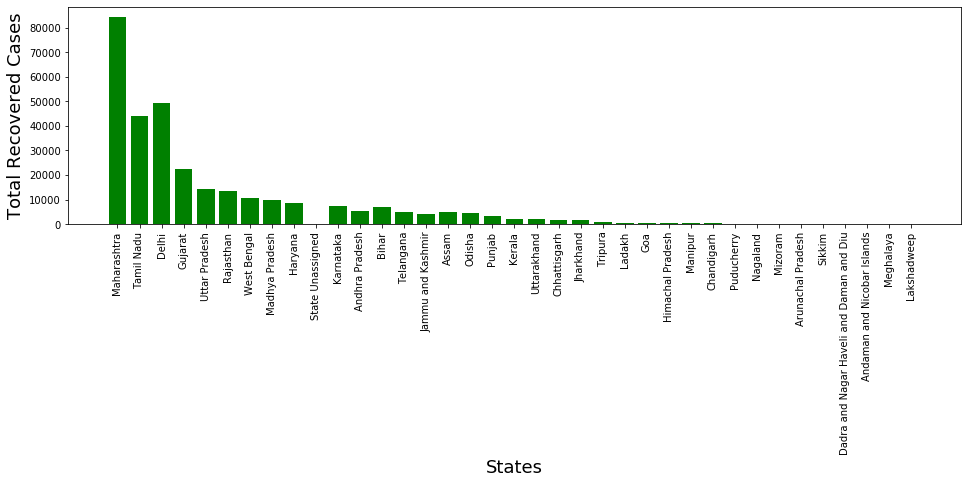

In [70]:

plt.rcParams["figure.figsize"] = (16, 4)

plt.bar(states_get['State'],states_get['Recovered'],color='g')

plt.xlabel('States',size=18)
plt.ylabel('Total Recovered Cases', size=18)
plt.xticks(rotation=90)

plt.show()

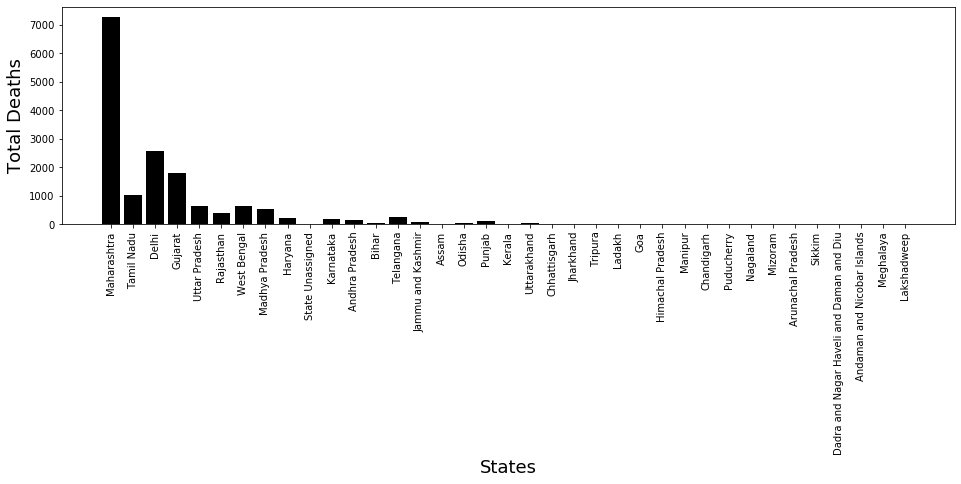

In [71]:
plt.rcParams["figure.figsize"] = (16, 4)

plt.bar(states_get['State'],states_get['Deaths'],color='k')

plt.xlabel('States',size=18)
plt.ylabel('Total Deaths', size=18)
plt.xticks(rotation=90)

plt.show()

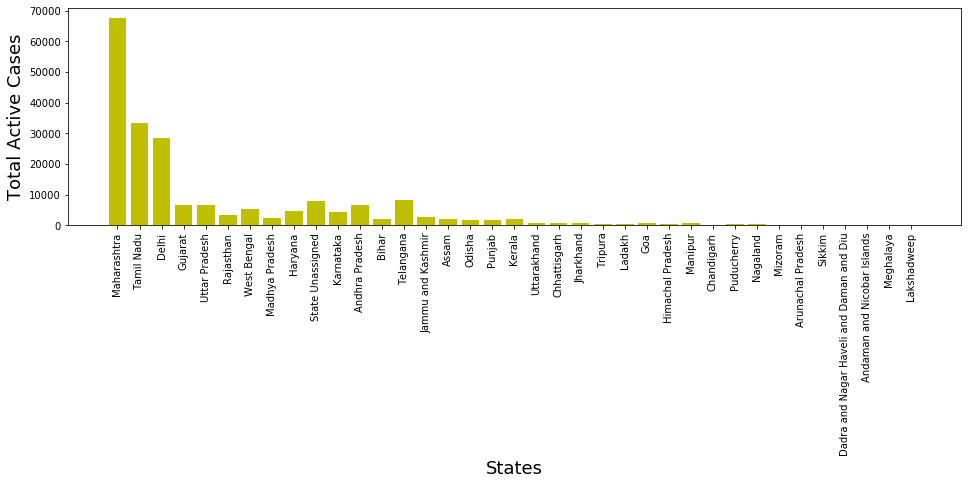

In [72]:
plt.rcParams["figure.figsize"] = (16, 4)

plt.bar(states_get['State'],states_get['Active'],color='y')

plt.xlabel('States',size=18)
plt.ylabel('Total Active Cases', size=18)
plt.xticks(rotation=90)

plt.show()

# Further Analysis

In [73]:
# finding the co-relation matrix
state_corr = states_get.corr()
state_corr

,Confirmed,Recovered,Deaths,Active,Migrated_Other,Delta_Confirmed,Delta_Recovered,Delta_Deaths
Confirmed,1.000000,0.993755,0.945048,0.988897,0.366038,0.982296,0.984284,0.990153
Recovered,0.993755,1.000000,0.934309,0.966546,0.338048,0.966772,0.975621,0.975088
Deaths,0.945048,0.934309,1.000000,0.930241,0.439567,0.901854,0.895182,0.958631
Active,0.988897,0.966546,0.930241,1.000000,0.386668,0.986623,0.980247,0.988732
Migrated_Other,0.366038,0.338048,0.439567,0.386668,1.000000,0.366903,0.365806,0.407410
Delta_Confirmed,0.982296,0.966772,0.901854,0.986623,0.366903,1.000000,0.982673,0.979971
Delta_Recovered,0.984284,0.975621,0.895182,0.980247,0.365806,0.982673,1.000000,0.977683
Delta_Deaths,0.990153,0.975088,0.958631,0.988732,0.407410,0.979971,0.977683,1.000000


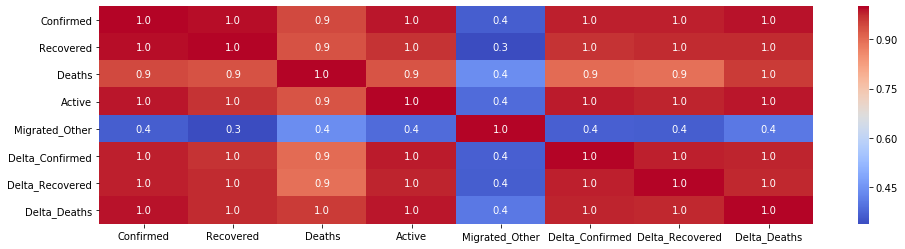

In [74]:
# Plotting the Co-relation matrix using HeatMap
sns.heatmap(state_corr, cmap='coolwarm', annot=True, fmt=".1f")
plt.show()

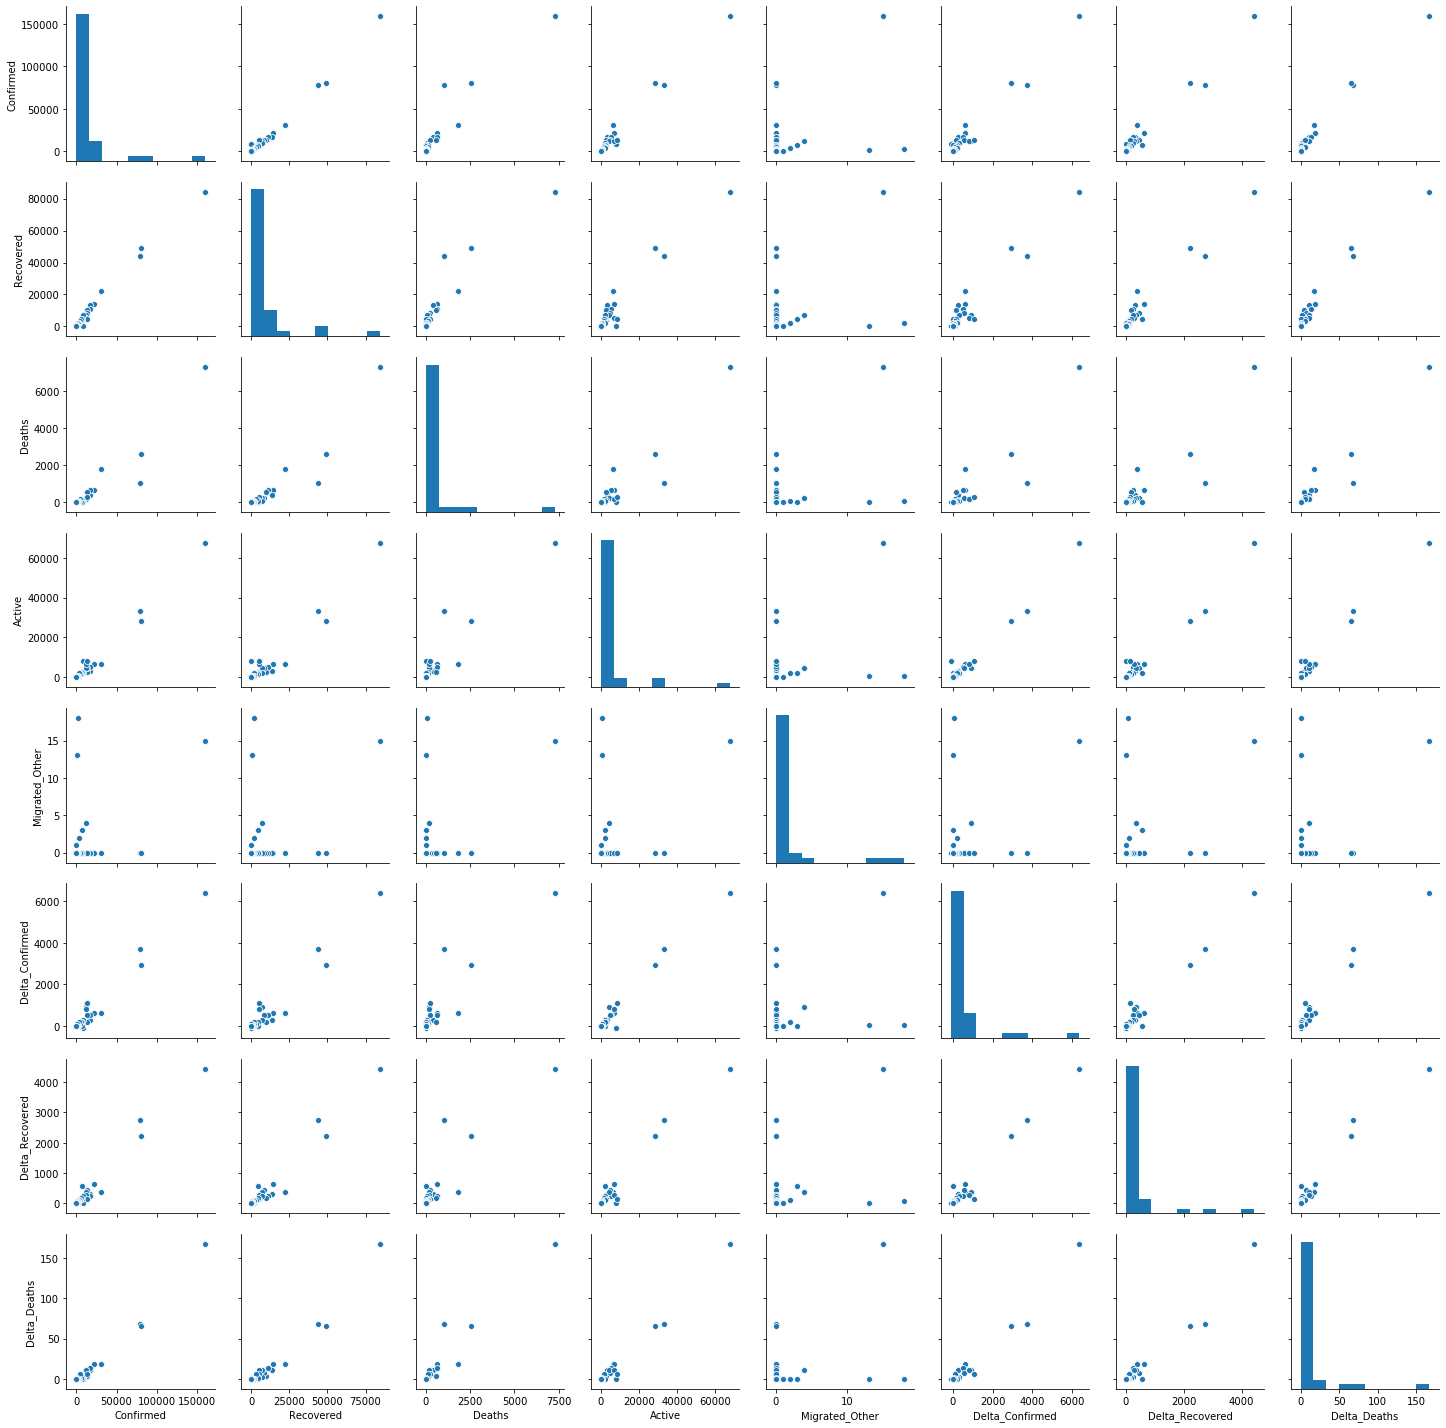

In [75]:

sns.pairplot(states_get)
plt.show()